In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
"""  
DataFrame shape (rows, columns): (14912, 24)

Columns and data types:
    Unnamed: 0                                 int64
    P_idx                                      int64
    Artist                                    object
    Title                                     object
    Year                                       int64
    Nationality                               object
    Style                                     object
    DataSrc                                   object
    url                                       object
    Img_width                                  int64
    Img_height                                 int64
    Resized_img_width                          int64
    Resized_img_height                         int64
    AspectRatio                              float64
    H0(3-bit median)                         float64
    I1                                       float64
    I2                                       float64
    Dir1                                      object
    Dir2                                      object
    Rc1                                      float64
    Rc2                                      float64
    Line1_(y1y2x1x2_with_top_left_origin)     object


"""

In [2]:
df = pd.read_csv('data/pnas_art_data.csv')
df.head()

,Unnamed: 0,P_idx,Artist,Title,Year,Nationality,Style,DataSrc,url,Img_width,...,AspectRatio,H0(3-bit median),I1,I2,Dir1,Dir2,Rc1,Rc2,Line1_(y1y2x1x2_with_top_left_origin),Line2_(y1y2x1x2_with_top_left_origin)
0,11929,0,"Aagaard, carl frederik",The Rose Garden,1877,Danish,Realism,WGA,http://www.wga.hu/html/a/aagaard/rosegard.html,950,...,1.085714,1.960759,0.128987,0.084821,h,v,0.347926,0.255000,"(151, 151, 0, 400)","(151, 434, 102, 102)"
1,11930,1,"Aagaard, carl frederik",Deer beside a Lake,1888,Danish,Realism,WGA,http://www.wga.hu/html/a/aagaard/deerlake.html,818,...,0.681667,1.787271,0.064063,0.058686,h,v,0.852941,0.857500,"(232, 232, 0, 400)","(0, 232, 343, 343)"
2,11931,2,"ABBATE, Niccolo dell'",Stag Hunt,1552,Italian,Mannerism,WGA,http://www.wga.hu/html/a/abbate/deerhunt.html,761,...,0.658304,1.323843,0.202154,0.103790,h,v,0.429658,0.665000,"(113, 113, 0, 400)","(0, 113, 266, 266)"
3,11932,3,"ABBATE, Niccolo dell'",The Rape of Proserpine,1570,Italian,Mannerism,WGA,http://www.wga.hu/html/a/abbate/proserpi.html,820,...,0.873269,1.774385,0.132212,0.067208,h,v,0.512894,0.760000,"(179, 179, 0, 400)","(0, 179, 304, 304)"
4,11933,4,"Abbati, giuseppe",Country Road with Cypresses,1860,Italian,Realism,WGA,http://www.wga.hu/html/a/abbati/abbati2.html,850,...,0.747581,1.534873,0.069923,0.079703,h,h,0.157191,0.440476,"(47, 47, 0, 400)","(158, 158, 0, 400)"


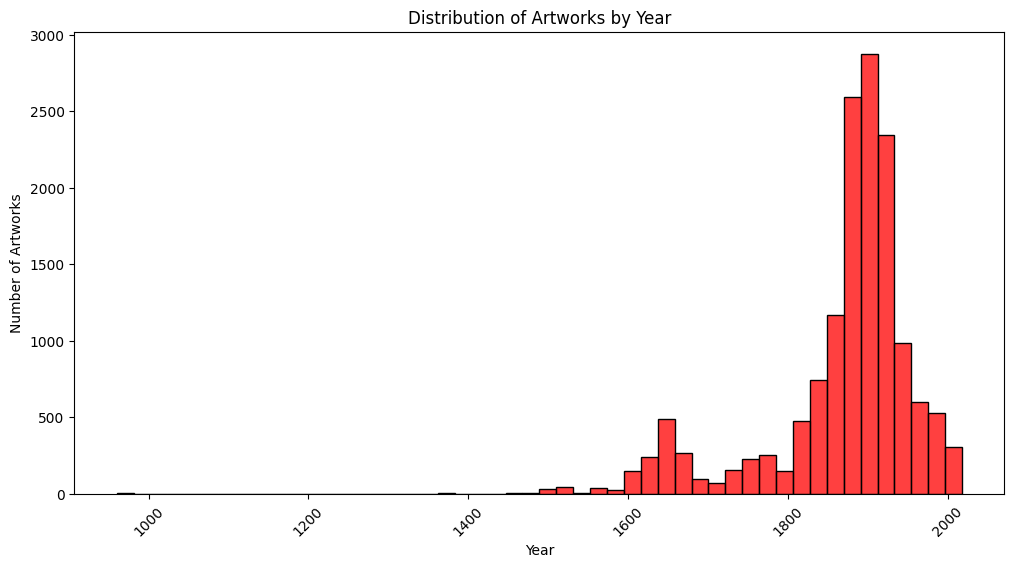

In [3]:
# Artworks by Year
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Year', bins=50, kde=False, color='red', edgecolor='black')
plt.title('Distribution of Artworks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45)
plt.show()

In [4]:
def clean_style(style_str):
    try:
        if '$$' in style_str:
            return style_str.replace('$$',' ')
        else:
            return style_str
    except TypeError:
        print(f'issue: {style_str}')
        return None

In [5]:
df['Style'] = df['Style'].apply(clean_style)

issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan
issue: nan

In [7]:
df['Century'] = ((df['Year']//100 )+1).astype(int)

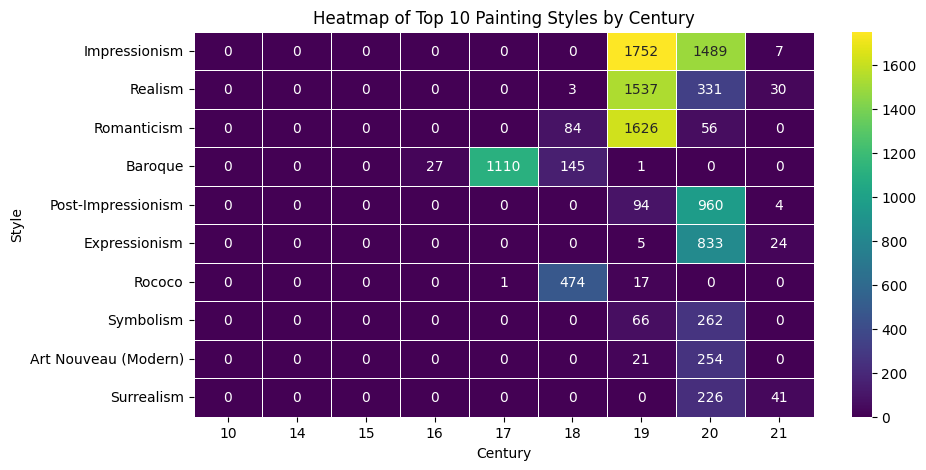

In [8]:
pivot_table = df.pivot_table(index='Style', columns='Century', aggfunc='size', fill_value=0)

style_sums = pivot_table.sum(axis=1)
top_styles = style_sums.sort_values(ascending=False).head(10)
top_pivot_table = pivot_table.loc[top_styles.index]

plt.figure(figsize=(10, 5))  
sns.heatmap(top_pivot_table, annot=True, fmt="d", cmap='viridis', linewidths=.5)
plt.title('Heatmap of Top 10 Painting Styles by Century')
plt.xlabel('Century')
plt.ylabel('Style')
plt.show()

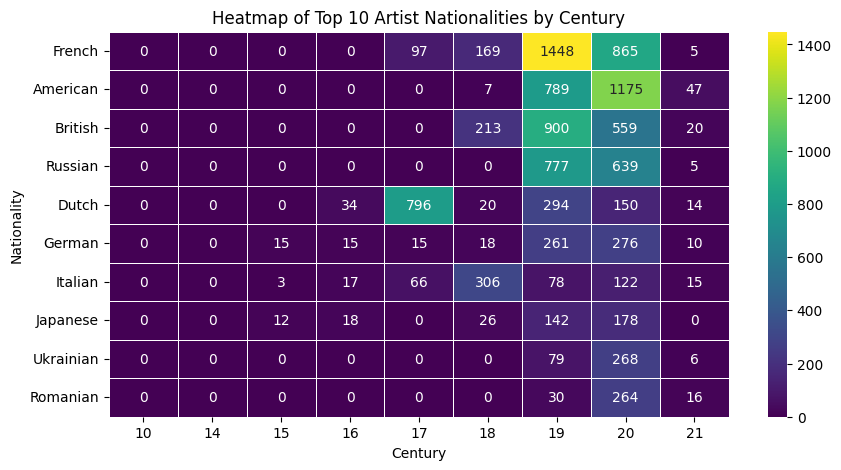

In [9]:
pivot_table = df.pivot_table(index='Nationality', columns='Century', aggfunc='size', fill_value=0)

df['Century'] = ((df['Year']//100 )+1).astype(int)

nationality_sums = pivot_table.sum(axis=1)
top_nationalities = nationality_sums.sort_values(ascending=False).head(10)
top_pivot_table = pivot_table.loc[top_nationalities.index]

plt.figure(figsize=(10, 5))  
sns.heatmap(top_pivot_table, annot=True, fmt="d", cmap='viridis', linewidths=.5)
plt.title('Heatmap of Top 10 Artist Nationalities by Century')
plt.xlabel('Century')
plt.ylabel('Nationality')
plt.show()

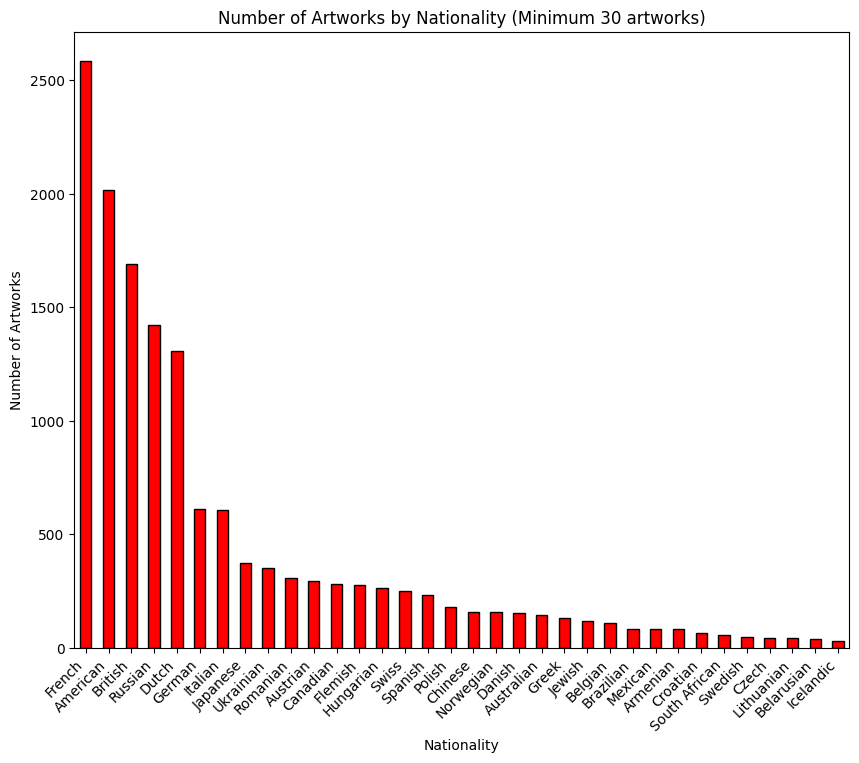

In [10]:
nationality_counts = df['Nationality'].value_counts()
filtered_nationality_counts = nationality_counts[nationality_counts >= 30]
sorted_nationality_counts = filtered_nationality_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sorted_nationality_counts.plot(kind='bar', color='red', edgecolor = 'black')
plt.title('Number of Artworks by Nationality (Minimum 30 artworks)')
plt.xlabel('Nationality')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [11]:
print("DataFrame shape (rows, columns):", df.shape)  # Size of the DataFrame

print("\nColumns and data types:\n", df.dtypes)  # Features and their data types

print("\nBasic statistics for numeric columns:\n", df.describe())  # Basic statistics

print("\nNon-numeric column summaries:\n", df.describe(include=['object', 'bool']))  # Summaries for non-numeric data

DataFrame shape (rows, columns): (14912, 24)

Columns and data types:
 Unnamed: 0                                 int64
P_idx                                      int64
Artist                                    object
Title                                     object
Year                                       int64
Nationality                               object
Style                                     object
DataSrc                                   object
url                                       object
Img_width                                  int64
Img_height                                 int64
Resized_img_width                          int64
Resized_img_height                         int64
AspectRatio                              float64
H0(3-bit median)                         float64
I1                                       float64
I2                                       float64
Dir1                                      object
Dir2                                      objec

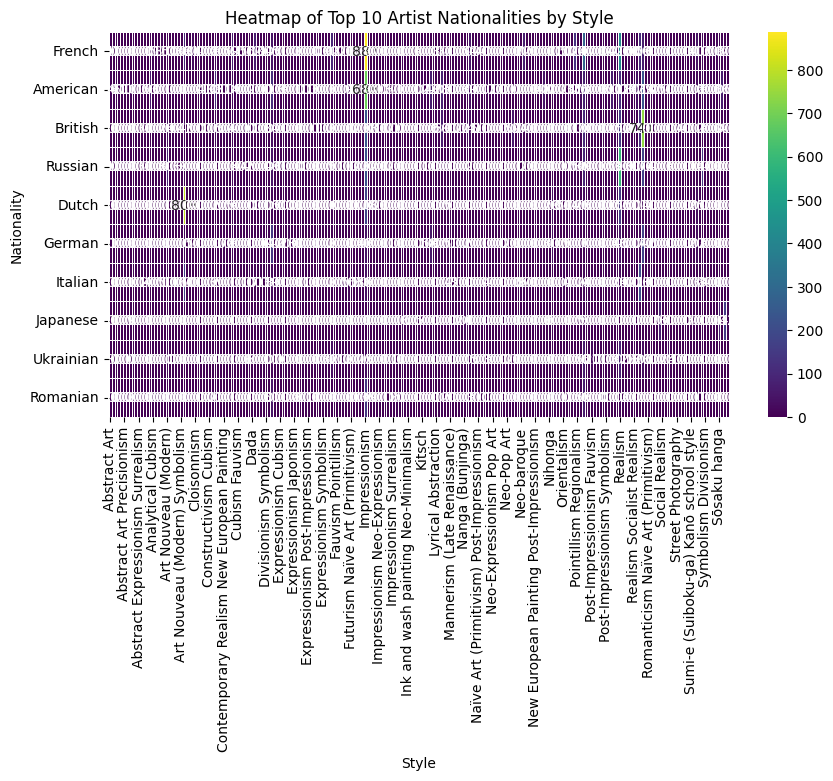

In [12]:
pivot_table = df.pivot_table(index='Nationality', columns='Style', aggfunc='size', fill_value=0)

nationality_sums = pivot_table.sum(axis=1).sort_values(ascending=False).head(10)
style_sums = pivot_table.sum(axis=0).sort_values(ascending=False).head(10)
top_pivot_table = pivot_table.loc[nationality_sums.index, style_sums.index]


plt.figure(figsize=(12, 8))  
sns.heatmap(top_pivot_table, annot=True, fmt="d", cmap='viridis', linewidths=.5)
plt.title('Heatmap of Top 10 Artist Nationalities by Top 10 Styles')
plt.xlabel('Style')
plt.ylabel('Nationality')
plt.show()